Task 1: Student Score Prediction

Description:

¤ Dataset (Recommended): Student Performance Factors (Kaggle
¤ Build a model to predict students' exam scores based on their study hour
¤ Perform data cleaning and basic visualization to understand the datase
¤ Split the dataset into training and testing set
¤ Train a linear regression model to estimate final score
¤ Visualize predictions and evaluate model performance

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [57]:
df=pd.read_csv("C:/Users/mervi/Downloads/StudentPerformanceFactors.csv")

In [58]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [59]:
##Shape of the Dataset
df.shape

(6607, 20)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [61]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [62]:
#missing values
df.isnull().sum().sort_values()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
School_Type                    0
Physical_Activity              0
Peer_Influence                 0
Learning_Disabilities          0
Exam_Score                     0
Gender                         0
Distance_from_Home            67
Teacher_Quality               78
Parental_Education_Level      90
dtype: int64

In [63]:
#duplicate values
df.duplicated().sum()

np.int64(0)

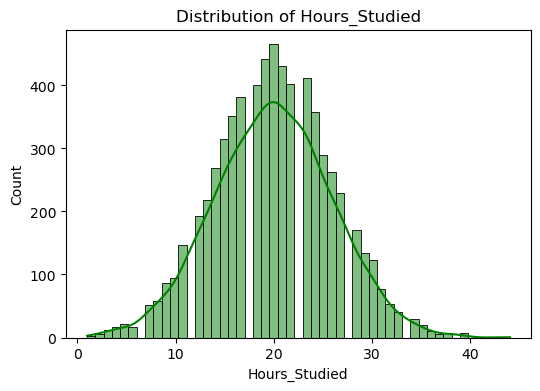

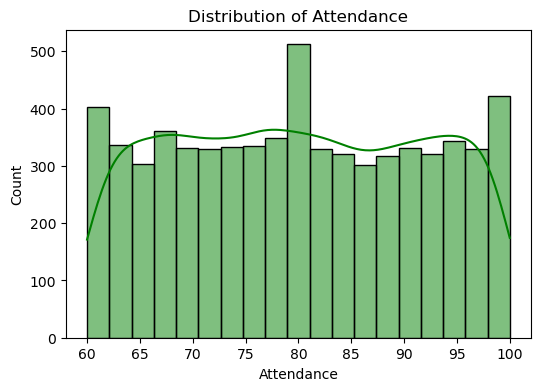

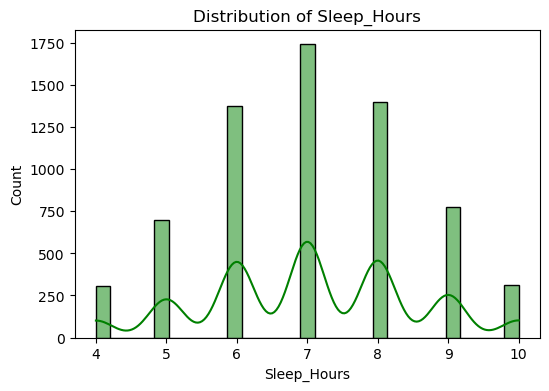

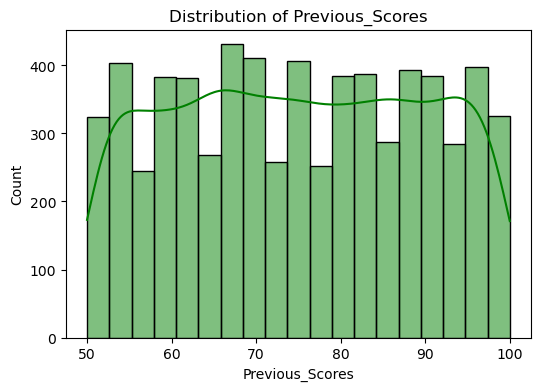

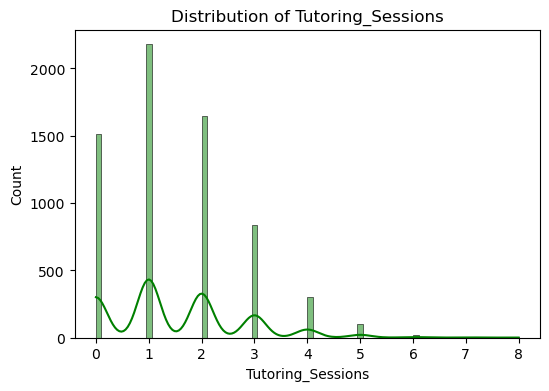

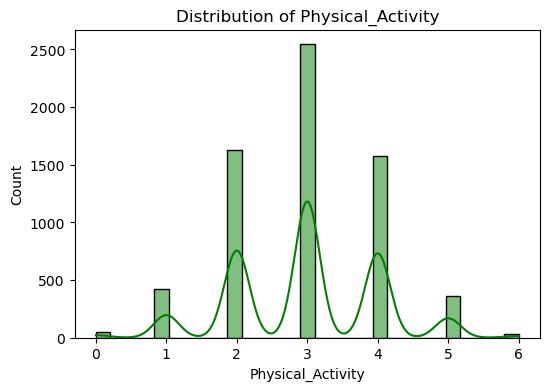

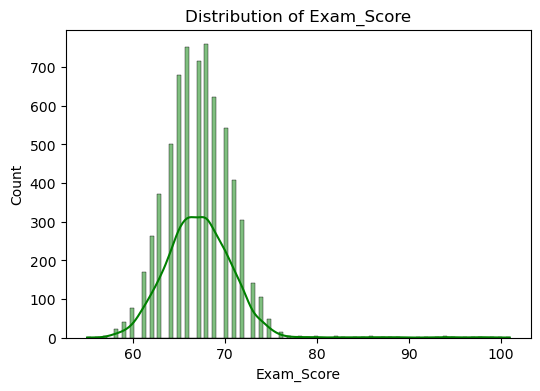

In [64]:
# ================================
 ## Univariate Analysis
# ================================
# Numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
    plt.show()


C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


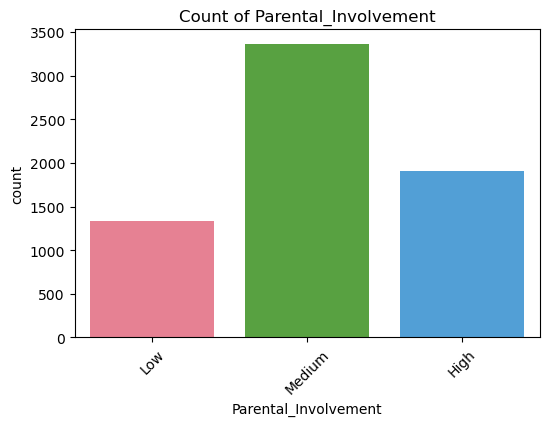

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


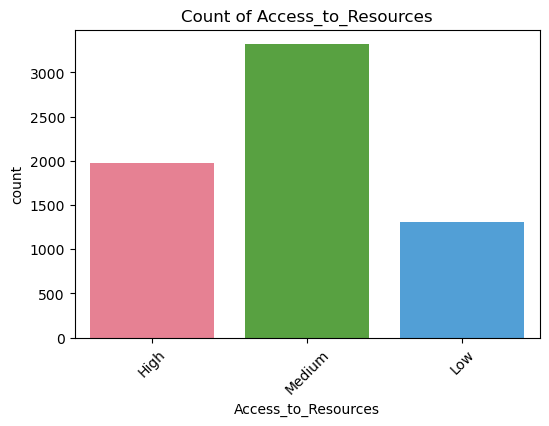

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


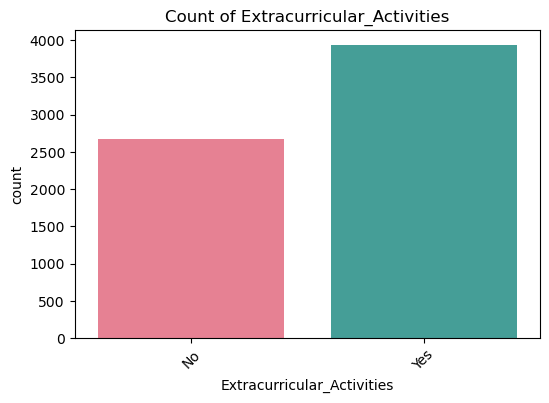

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


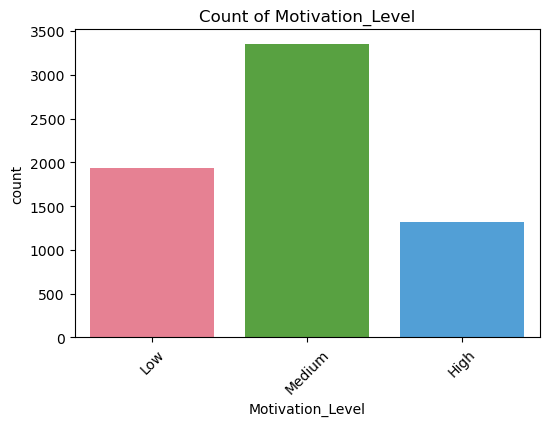

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


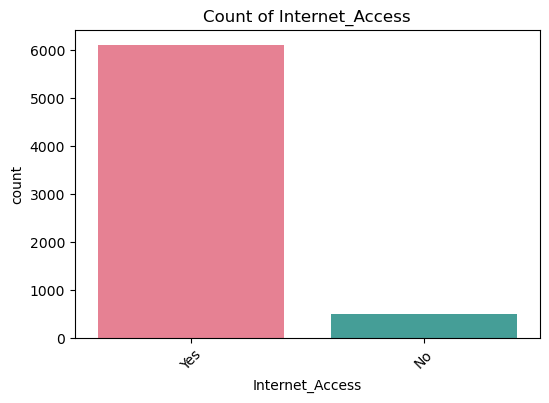

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


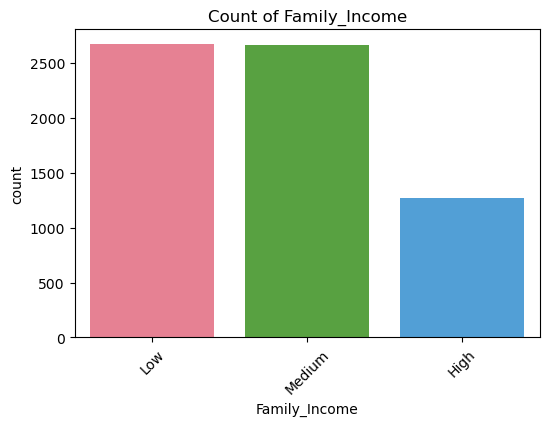

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


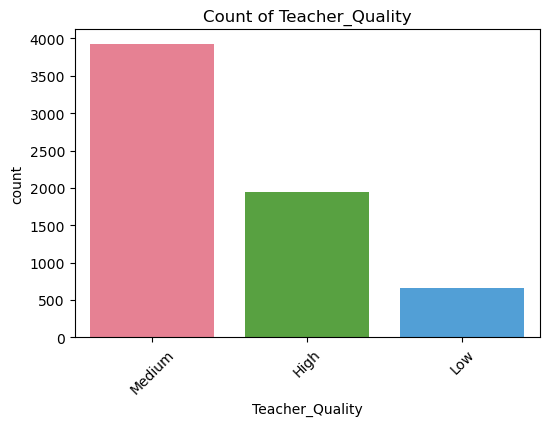

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


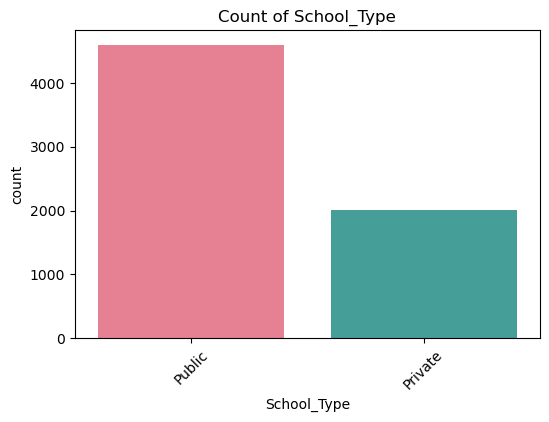

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


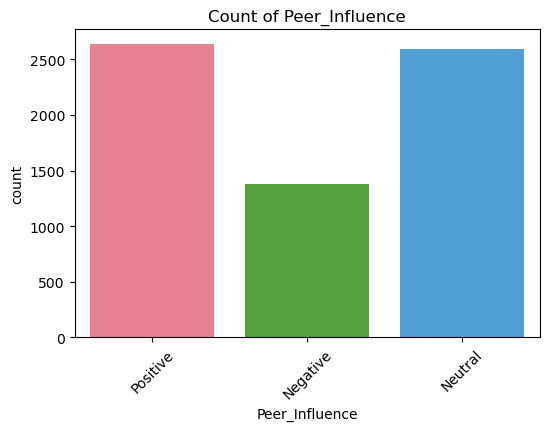

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


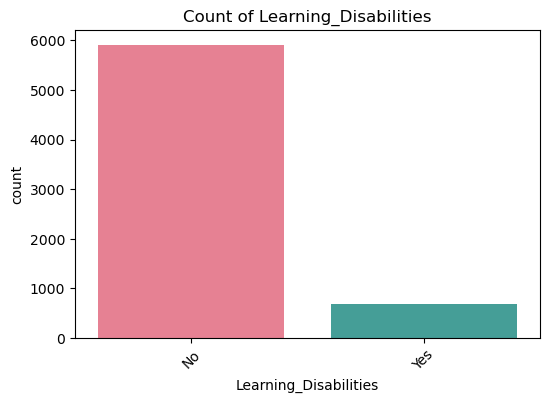

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


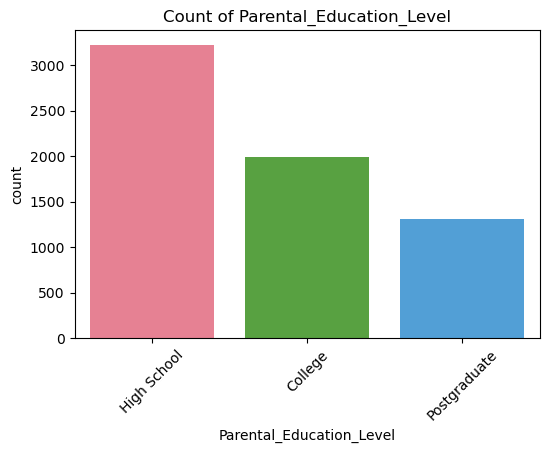

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


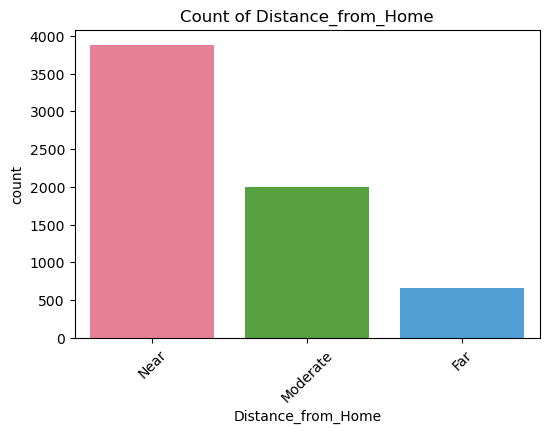

C:\Users\mervi\AppData\Local\Temp\ipykernel_2080\1375588715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="husl")


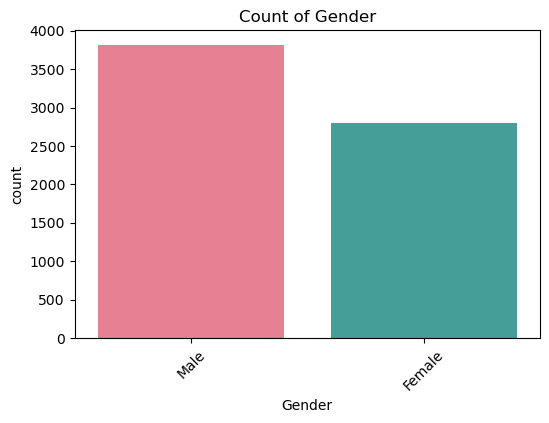

In [65]:
# ================================
#  Categorical Features
# ================================
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],palette="husl")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

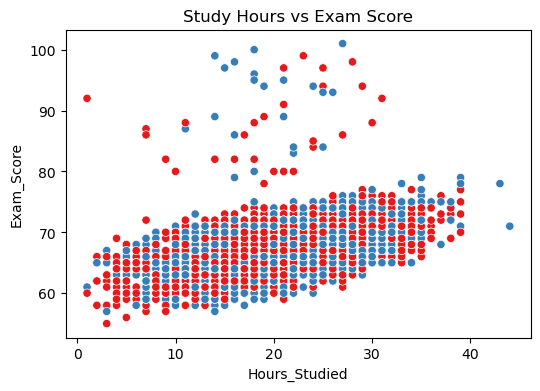

In [66]:
# ================================
# Bivariate Analysis
# ================================
# Relationship between study hours & exam score
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Hours_Studied',
    y='Exam_Score',
    hue='Gender',
    data=df,
    palette='Set1',
    legend=False  
)
plt.title("Study Hours vs Exam Score")
plt.show()


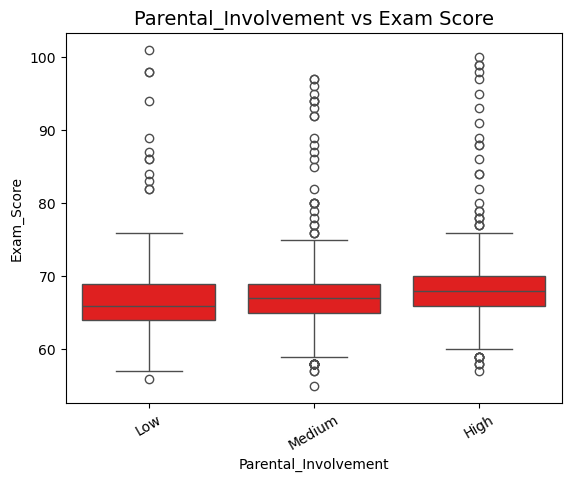

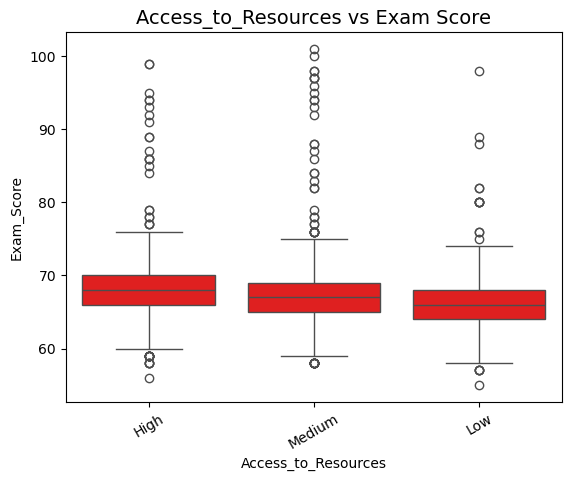

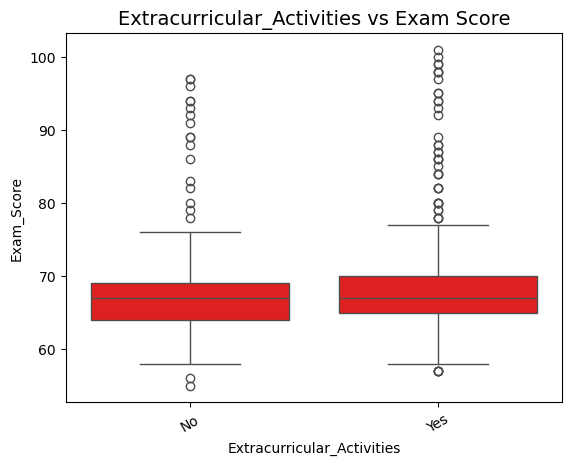

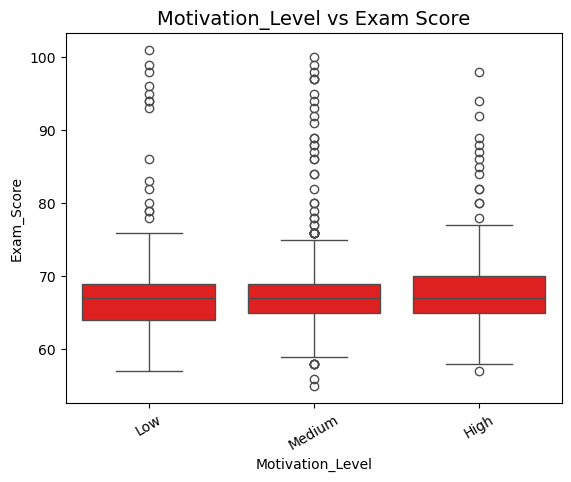

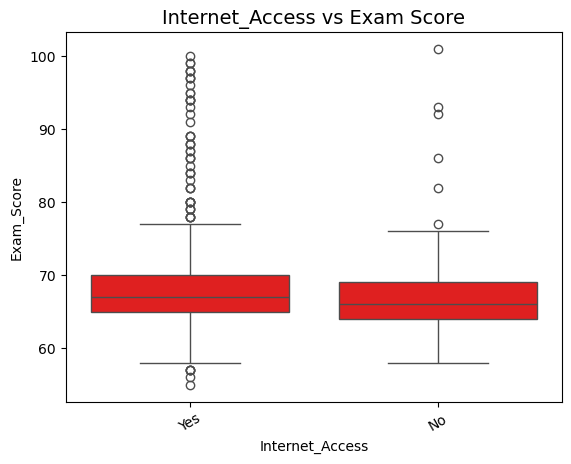

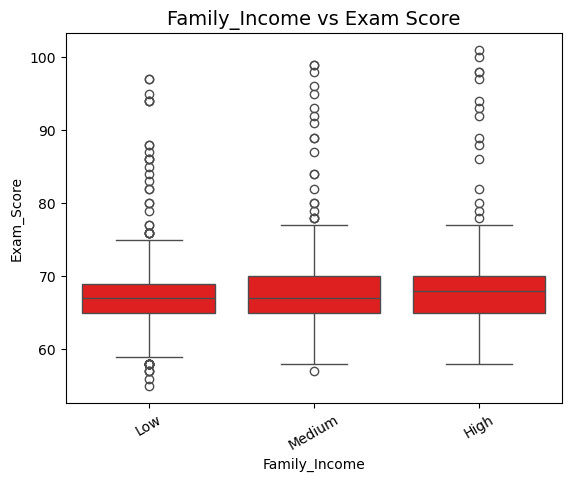

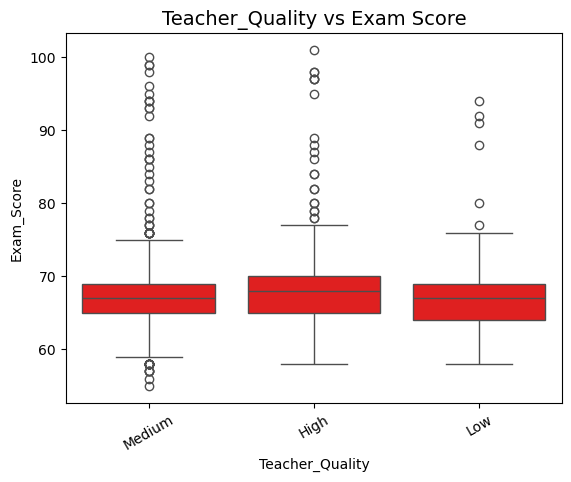

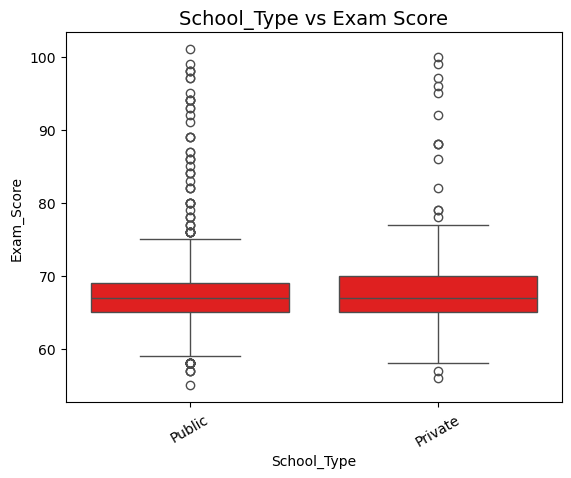

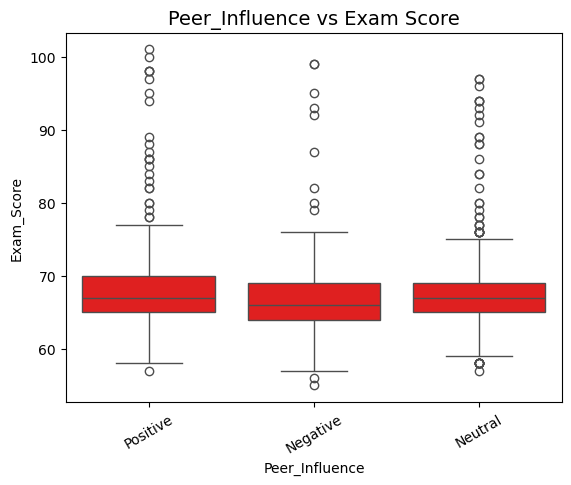

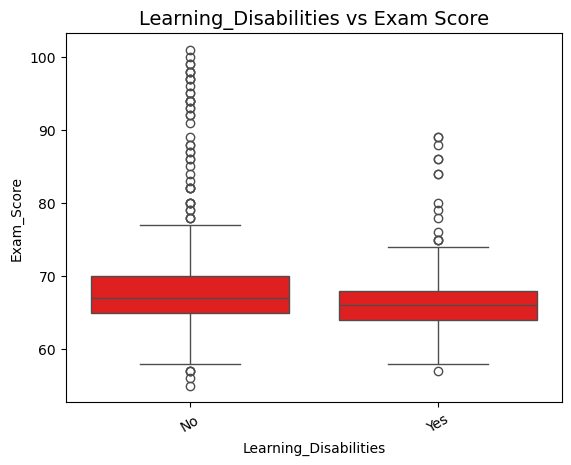

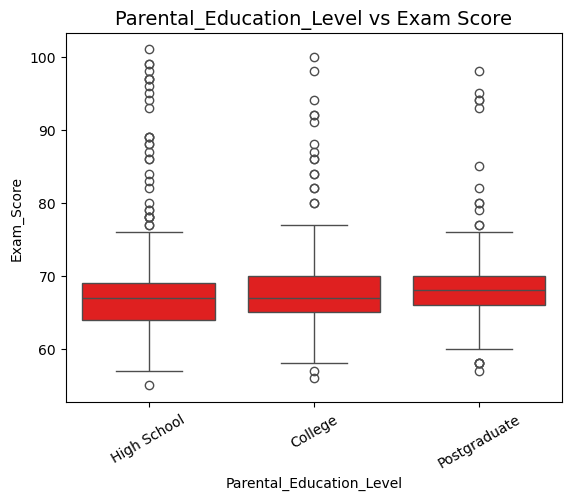

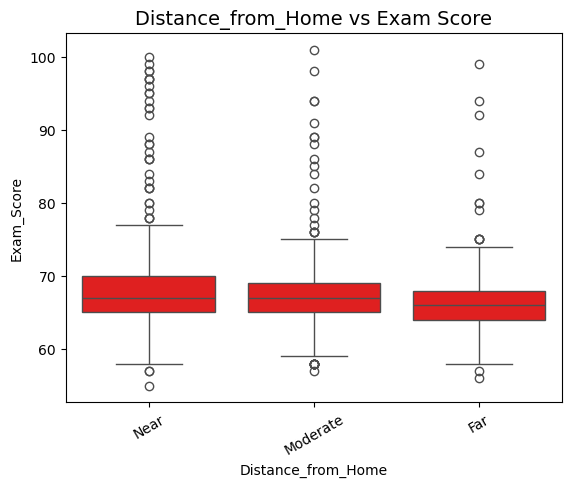

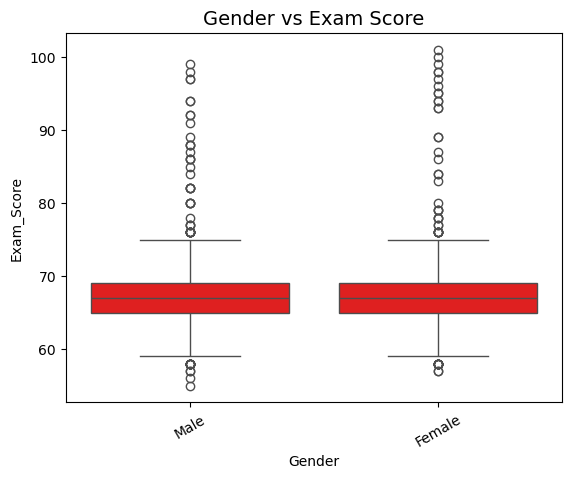

In [67]:
# Boxplots for categorical features vs exam score
for col in categorical_cols:
    plt.figure()
    sns.boxplot(x=col, y='Exam_Score', data=df,color ='r')
    plt.title(f"{col} vs Exam Score", fontsize=14)
    plt.xticks(rotation=30)
    plt.show()

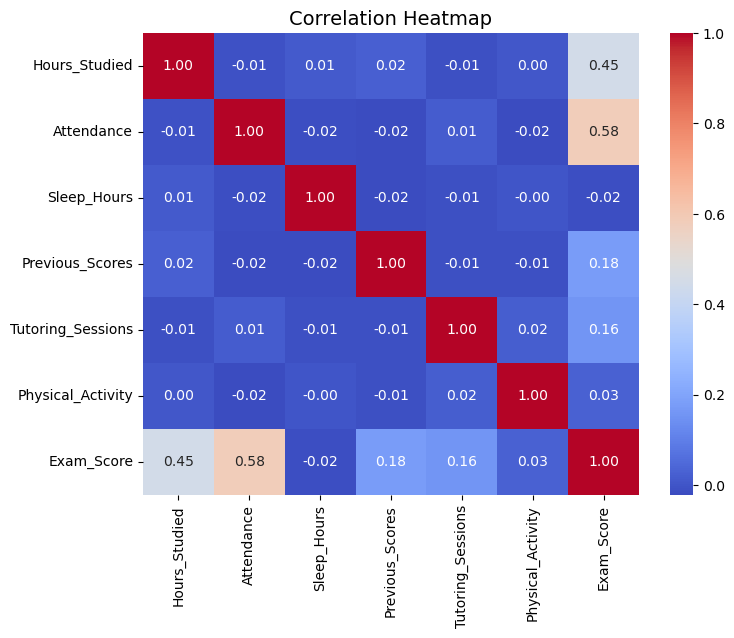

In [68]:
# ================================
#  Correlation Heatmap
# ================================
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

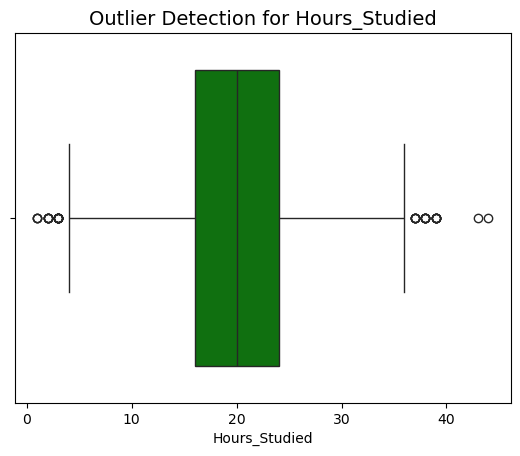

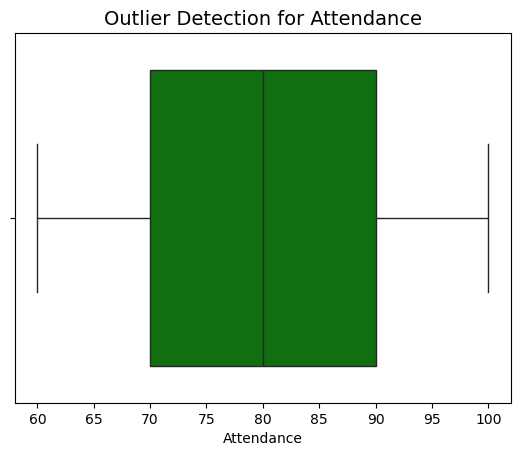

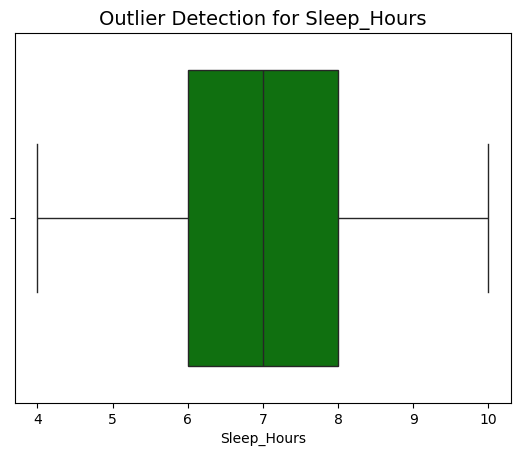

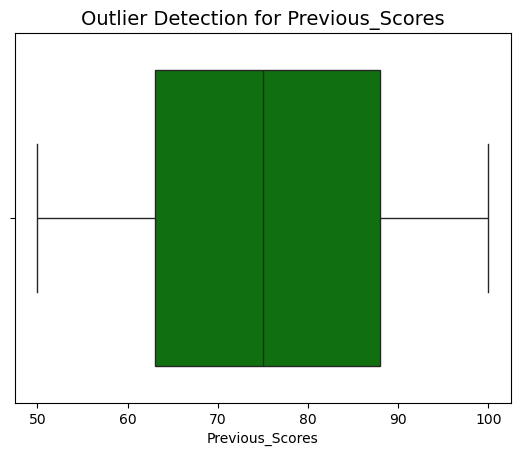

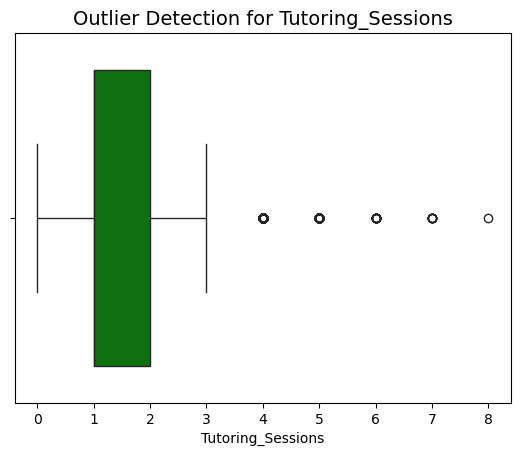

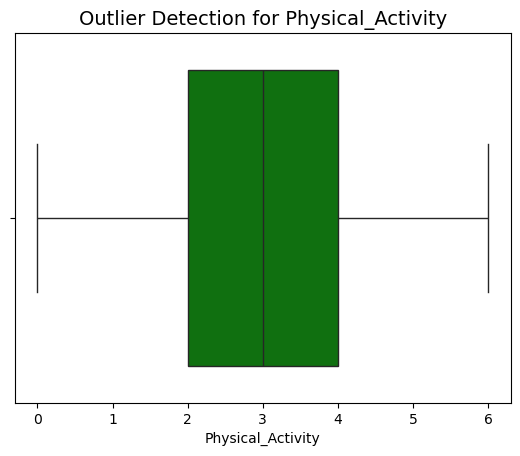

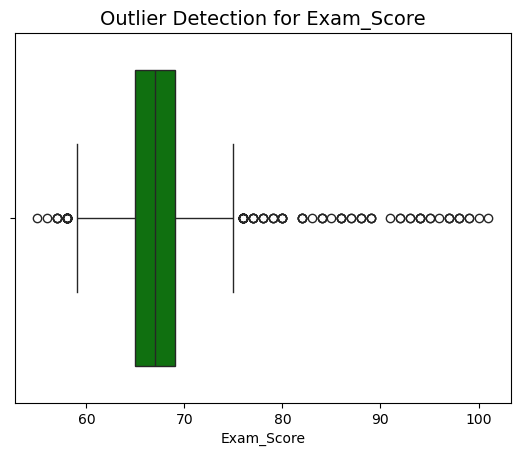

In [69]:
# ================================
# 9. Outlier Detection
# ================================
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col], color="g") 
    plt.title(f"Outlier Detection for {col}", fontsize=14)
    plt.show()

In [70]:
study_col="Hours_Studied"

X=df[[study_col]]
Y=df["Exam_Score"]

# ================================
# Split into Train & Test Sets
# ================================
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ================================
# Train the Model
# ================================
model = LinearRegression()
model.fit(X_train, Y_train)

# ================================
# Predictions
# ================================
Y_pred = model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 23.20


In [71]:
print(model.predict(X.head()))


[68.08154859 66.93887361 68.36721734 69.79556106 66.93887361]


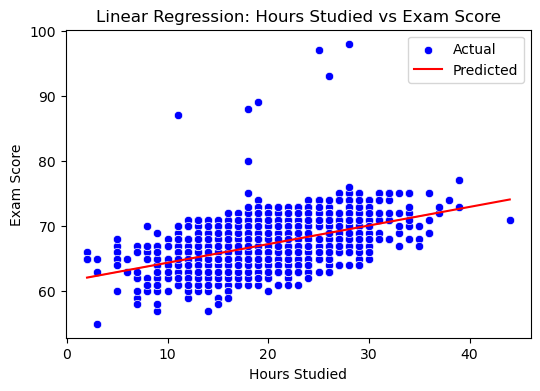

In [72]:
# Scatter plot of actual test data
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test[study_col], y=Y_test, label='Actual', color='blue')

# Regression line
sns.lineplot(x=X_test[study_col], y=Y_pred, label='Predicted', color='red')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.legend()
plt.show()


In [73]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

In [74]:
df_scores = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² score": [r2],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae]
})

df_scores

,Model,R² score,MSE,RMSE,MAE
0,Linear Regression,0.231987,10.855921,3.294833,2.447569


In [75]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

Categorical Columns: 13


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [76]:
####Removing outliers####
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical Columns:", len(numeric_cols))
# Create a copy to store cleaned data
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter values within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_clean.shape)

Numerical Columns: 20
Original dataset shape: (6607, 20)
Cleaned dataset shape: (4944, 20)


In [77]:
### Training data after removing outliers and applied the Linear Regression Model. 
###Using all the features to train the dataset to predict the score which will improve the accuracy of the model.
X = df_clean.drop(columns=['Exam_Score'])
y = df_clean['Exam_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  


In [79]:
print(f'Mean squared error with outliers: {mse}')
print(f'R^2 score with outliers: {r2}')


Mean squared error with outliers: 1.274069845550482
R^2 score with outliers: 0.8729243834345273


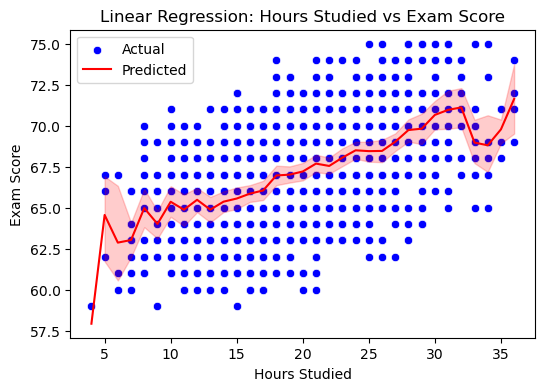

In [80]:
# Scatter plot of actual test data
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test[study_col], y=y_test, label='Actual', color='blue')

# Regression line
sns.lineplot(x=X_test[study_col], y=y_pred, label='Predicted', color='red')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.legend()
plt.show()

In [109]:
####Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

X = df_clean[["Hours_Studied"]].to_numpy()
y = df_clean["Exam_Score"].to_numpy()


# Recreate polynomial transformer
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions
y_pred = poly_model.predict(X_poly)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 7.689729606786776
R² Score: 0.2513644502293192


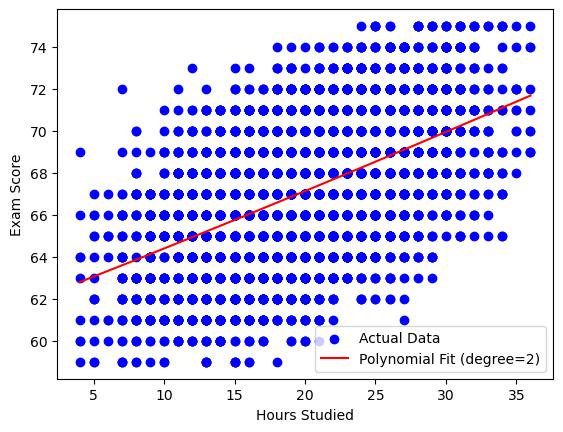

In [110]:
X_sorted = np.sort(X, axis=0)
X_sorted_poly = poly.transform(X_sorted)

plt.scatter(X.flatten(), y, color="blue", label="Actual Data")
plt.plot(X_sorted.flatten(),
         poly_model.predict(X_sorted_poly),
         color="red", label=f"Polynomial Fit (degree={degree})")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()
